In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Neural Network Architechture

In [10]:
# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10   # 10 hidden layer, each with 500 nuerons
nonlinearities = ['tanh']*len(hidden_layer_sizes)

# Small Random Weight

- Small random weight center around the zero with unit gaussian
- Activation becomes smaller with funtion of num of layers. Eg: 0.1 X 0.1 < 0.1
- Makes local Gradient on weight small (derivative formula) -> Kill the flow of gradient single with lots of matrix multipilcation in backprop. 

## Single forward pass

In [4]:
act = {'relu': lambda x: np.maximum(0, x), 'tanh': lambda x: np.tanh(x)}

# single forward pass
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01 # layer initialization - small weight
    
    H = np.dot(X, W) # matrix multipy
    H = act[nonlinearities[i]](H) # tanh nonlinearity
    Hs[i] = H # cache result on this layer

## look at distribution at each layer

In [5]:
print('Input layer had mean= {} and std= {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("Hidden layer {} had mean= {} and std= {}".format(i+1, layer_means[i], layer_stds[i]))

Input layer had mean= -0.0015816884038411852 and std= 0.9989483816236376
Hidden layer 1 had mean= -0.00021112244634167467 and std= 0.21336246952962942
Hidden layer 2 had mean= -9.400962460597268e-05 and std= 0.04773355515884554
Hidden layer 3 had mean= 7.044194165033804e-06 and std= 0.01064648581774013
Hidden layer 4 had mean= -2.4465376603443614e-07 and std= 0.0023811483452537657
Hidden layer 5 had mean= -2.642764826647225e-09 and std= 0.0005325528960388486
Hidden layer 6 had mean= 9.572976445696659e-08 and std= 0.00011909270393382383
Hidden layer 7 had mean= 4.130283432604956e-09 and std= 2.655323456333206e-05
Hidden layer 8 had mean= -1.6216587741076798e-08 and std= 5.899191322999036e-06
Hidden layer 9 had mean= 5.338738274806895e-10 and std= 1.312702544047368e-06
Hidden layer 10 had mean= -1.4265542453769774e-10 and std= 2.93974241110757e-07


## Plot the means and standrad deviations of activation

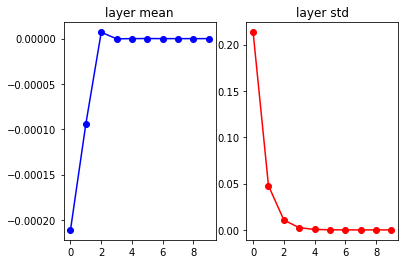

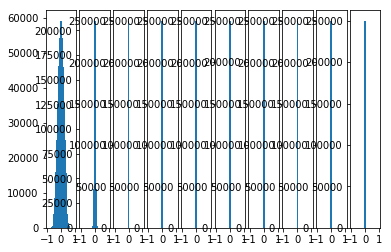

In [6]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distribution
fig = plt.figure()
fig.subplots_adjust(hspace=0.10, wspace=0.10)  # not working 
for i, H in Hs.items():
    ax = fig.add_subplot(1, len(Hs), i+1)
    ax.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

 # Large | Random Weights |  -> Saturation
 
- Large here is compared with smaller random weight in range [-1. 1]
- Causes Activation to saturate with large Weight.
- 2 cases of saturation, Weight Matrix(W):
    1. W > 0: activation to Right side Saturation of Tanh
    1. W < 0: activation to Left side Saturation of Tanh


In [11]:
# single forward pass
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 1.0 # layer initialization - large weights
    
    H = np.dot(X, W) # matrix multipy
    H = act[nonlinearities[i]](H) # tanh nonlinearity
    Hs[i] = H # cache result on this layer

In [12]:
print('Input layer had mean= {} and std= {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("Hidden layer {} had mean= {} and std= {}".format(i+1, layer_means[i], layer_stds[i]))

Input layer had mean= 0.003189041616032122 and std= 1.0009386879960462
Hidden layer 1 had mean= 0.0006033989675809474 and std= 0.9820651363130366
Hidden layer 2 had mean= 0.002046501990866646 and std= 0.9815564567338725
Hidden layer 3 had mean= 0.0011699830316478802 and std= 0.9816436273317852
Hidden layer 4 had mean= -0.0007245395293946674 and std= 0.9817011423915248
Hidden layer 5 had mean= -0.00016401471410270636 and std= 0.9817047434189311
Hidden layer 6 had mean= 0.002398907985936386 and std= 0.9817155974523863
Hidden layer 7 had mean= 0.0010788868766518874 and std= 0.9815928425357207
Hidden layer 8 had mean= -0.0014989913888530156 and std= 0.9817778477873962
Hidden layer 9 had mean= 0.0018512461550558082 and std= 0.9816832077146034
Hidden layer 10 had mean= -0.0009211190598631304 and std= 0.9817573528625502


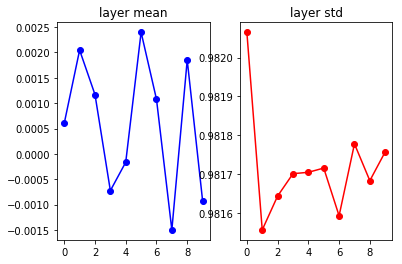

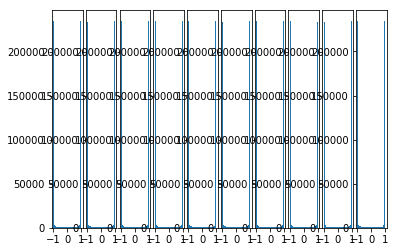

In [13]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distribution
fig = plt.figure()
fig.subplots_adjust(hspace=0.10, wspace=0.10)  # not working 
for i, H in Hs.items():
    ax = fig.add_subplot(1, len(Hs), i+1)
    ax.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

# Xavier Initialization -> Input vairiance == Output variance

- Assumes Linear activation (active region of tanh)

In [14]:
# single forward pass
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # layer initialization
    
    H = np.dot(X, W) # matrix multipy
    H = act[nonlinearities[i]](H) # tanh nonlinearity
    Hs[i] = H # cache result on this layer

In [15]:
print('Input layer had mean= {} and std= {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("Hidden layer {} had mean= {} and std= {}".format(i+1, layer_means[i], layer_stds[i]))

Input layer had mean= 0.003189041616032122 and std= 1.0009386879960462
Hidden layer 1 had mean= -0.0007884306809480572 and std= 0.6286384074846728
Hidden layer 2 had mean= 0.0001927332749276647 and std= 0.48607511059462793
Hidden layer 3 had mean= 0.0001687235954515215 and std= 0.40848705363283927
Hidden layer 4 had mean= -0.00032891567597607366 and std= 0.3585942244560435
Hidden layer 5 had mean= -0.00018568326987254978 and std= 0.322433313595364
Hidden layer 6 had mean= 0.0003849116035738881 and std= 0.2945363677526585
Hidden layer 7 had mean= 0.0010476514917749985 and std= 0.27167786009870404
Hidden layer 8 had mean= -7.814684659026155e-05 and std= 0.2536699501986727
Hidden layer 9 had mean= 0.00020829657478370543 and std= 0.24012862024181117
Hidden layer 10 had mean= 0.00026255232597403476 and std= 0.22790242016782303


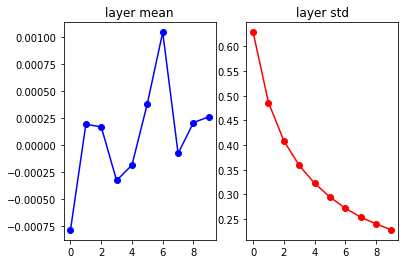

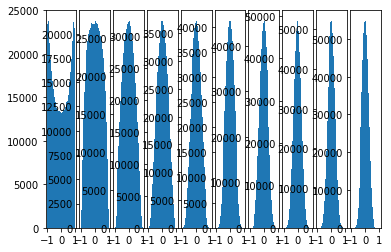

In [16]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distribution
fig = plt.figure()
fig.subplots_adjust(hspace=0.10, wspace=0.10)  # not working 
for i, H in Hs.items():
    ax = fig.add_subplot(1, len(Hs), i+1)
    ax.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

# Xavier Initialization - Breaks with ReLU

- ReLU kills approx half of the activation at a time.
- So its halving the Variance on output of ReLU unit.
- Therefore variance gets decrease along the layer. In other word activation distribution starts to collapes.

In [17]:
nonlinearities = ['relu']*len(hidden_layer_sizes)

In [24]:
# single forward pass
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # layer initialization
    
    H = np.dot(X, W) # matrix multipy
    H = act[nonlinearities[i]](H) # reLU nonlinearity
    Hs[i] = H # cache result on this layer

In [25]:
print('Input layer had mean= {} and std= {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("Hidden layer {} had mean= {} and std= {}".format(i+1, layer_means[i], layer_stds[i]))

Input layer had mean= 0.003189041616032122 and std= 1.0009386879960462
Hidden layer 1 had mean= 0.39878257479303914 and std= 0.5842990825267287
Hidden layer 2 had mean= 0.2679564448361014 and std= 0.4032393502431422
Hidden layer 3 had mean= 0.19030488173838594 and std= 0.28028872126808
Hidden layer 4 had mean= 0.13242263154493586 and std= 0.19585400115483748
Hidden layer 5 had mean= 0.10243834804234662 and std= 0.14311208703909464
Hidden layer 6 had mean= 0.06848789050299778 and std= 0.10153969707107555
Hidden layer 7 had mean= 0.05026804552688525 and std= 0.0721219895117993
Hidden layer 8 had mean= 0.0332769098873187 and std= 0.04690209540447531
Hidden layer 9 had mean= 0.022551655144858688 and std= 0.03303019555407182
Hidden layer 10 had mean= 0.016431094180012006 and std= 0.024170728811206212


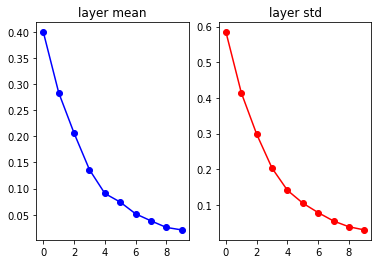

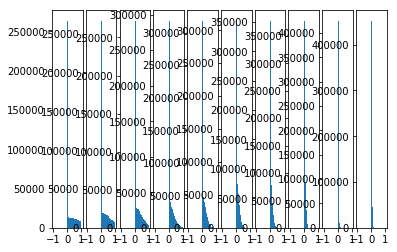

In [23]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distribution
fig = plt.figure()
fig.subplots_adjust(hspace=0.10, wspace=0.10)  # not working 
for i, H in Hs.items():
    ax = fig.add_subplot(1, len(Hs), i+1)
    ax.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

# Weight Initialization for ReLU

In [26]:
nonlinearities = ['relu']*len(hidden_layer_sizes)

In [42]:
# single forward pass
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2) # layer initialization
    
    H = np.dot(X, W) # matrix multipy
    H = act[nonlinearities[i]](H) # reLU nonlinearity
    Hs[i] = H # cache result on this layer

In [43]:
print('Input layer had mean= {} and std= {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("Hidden layer {} had mean= {} and std= {}".format(i+1, layer_means[i], layer_stds[i]))

Input layer had mean= 0.003189041616032122 and std= 1.0009386879960462
Hidden layer 1 had mean= 0.5662669699408376 and std= 0.8288589262563435
Hidden layer 2 had mean= 0.5414958347817564 and std= 0.8174833158253036
Hidden layer 3 had mean= 0.5451883854200082 and std= 0.8023020717472508
Hidden layer 4 had mean= 0.5595185732525753 and std= 0.8107194955511137
Hidden layer 5 had mean= 0.5508031475369198 and std= 0.7964468869156014
Hidden layer 6 had mean= 0.5481312471810583 and std= 0.7964840032010209
Hidden layer 7 had mean= 0.5694819657296812 and std= 0.8046519693865527
Hidden layer 8 had mean= 0.5471116791272604 and std= 0.8157492692556491
Hidden layer 9 had mean= 0.5126404353979163 and std= 0.7622089300534235
Hidden layer 10 had mean= 0.5334219962187721 and std= 0.7527394379080087


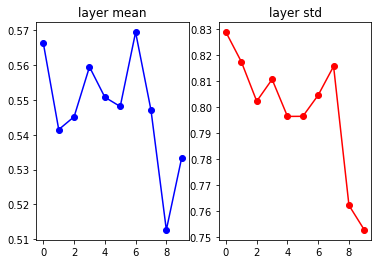

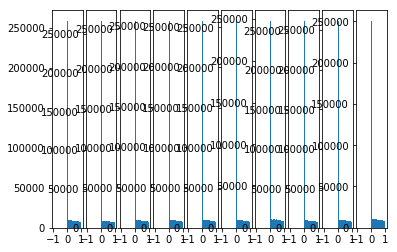

In [44]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distribution
fig = plt.figure()
fig.subplots_adjust(hspace=0.10, wspace=0.10)  # not working 
for i, H in Hs.items():
    ax = fig.add_subplot(1, len(Hs), i+1)
    ax.hist(H.ravel(), 30, range=(-1, 1))

plt.show()